In [6]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
#import a_funciones as fn
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
conn=sql.connect(r'C:\Users\Estefanìa\OneDrive\Escritorio\Python\db_movies') ### crear cuando no existe el nombre de cd  y para conectarse cuando sí existe.
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos

In [8]:
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()

[('ratings',), ('movies',), ('movies_2',), ('ratings_2',)]

In [10]:
###calcular la distribución de calificaciones
cr=pd.read_sql(""" select 
                          rating, 
                          count(*) as conteo 
                          from "ratings_2"
                          group by rating
                          order by conteo desc""", conn)

In [12]:
pd.read_sql("select count(*) from ratings_2", conn)

data  = go.Bar( x=cr.rating,y=cr.conteo, text=cr.conteo, textposition="outside")
Layout=go.Layout(title="Count of ratings",xaxis={'title':'Rating'},yaxis={'title':'Count'})
go.Figure(data,Layout)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'text': array([26818., 20047., 13211., 13136.,  8551.,  7551.,  5550.,  2811.,  1791.,
                              1370.]),
              'textposition': 'outside',
              'type': 'bar',
              'x': array([4. , 3. , 5. , 3.5, 4.5, 2. , 2.5, 1. , 1.5, 0.5]),
              'y': array([26818, 20047, 13211, 13136,  8551,  7551,  5550,  2811,  1791,  1370])}],
    'layout': {'template': '...',
               'title': {'text': 'Count of ratings'},
               'xaxis': {'title': {'text': 'Rating'}},
               'yaxis': {'title': {'text': 'Count'}}}
})

In [15]:
### calcular cada usuario cuántas péliculas calificó
rating_users=pd.read_sql(''' select userId,
                         count(*) as cnt_rat
                         from "ratings_2"
                         group by UserId
                         order by cnt_rat asc
                         ''',conn )

In [17]:
rating_users

,userId,cnt_rat
0,53,20
1,147,20
2,189,20
3,194,20
4,207,20
...,...,...
605,274,1346
606,448,1864
607,474,2108
608,599,2478


Text(0, 0.5, 'Frecuencia')

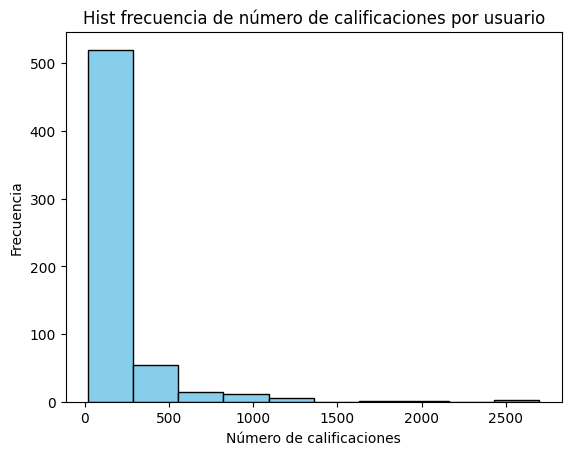

In [16]:
plt.hist(rating_users['cnt_rat'], bins=10, color='skyblue', edgecolor='black')
plt.title('Hist frecuencia de número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

In [50]:
#35 películas por año × 60 años = 2,100 películas a lo largo de su vida.
rating_users2 = pd.read_sql(''' select userId,
                         count(*) as cnt_rat
                         from "ratings_2"
                         group by UserId
                         having cnt_rat >=100 and cnt_rat <=2100
                         order by cnt_rat asc
                         ''',conn )

In [51]:
rating_users2

,userId,cnt_rat
0,39,100
1,373,100
2,604,100
3,601,101
4,32,102
...,...,...
240,380,1218
241,68,1260
242,610,1302
243,274,1346


Text(0, 0.5, 'Frecuencia')

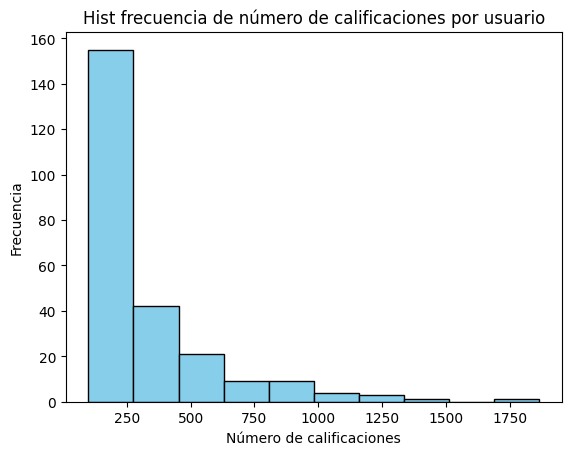

In [52]:
### graficar distribucion despues de filtrar datos
plt.hist(rating_users2['cnt_rat'], bins=10, color='skyblue', edgecolor='black')
plt.title('Hist frecuencia de número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')


In [27]:

#### verificar cuantas calificaciones tiene cada pelicula
rating_books=pd.read_sql(''' select movieId,
                         count(*) as cnt_rat
                         from "ratings_2"
                         group by movieId
                         order by cnt_rat desc
                         ''',conn )

In [28]:
rating_books.describe()

,movieId,cnt_rat
count,9724.000000,9724.000000
mean,42245.024373,10.369807
std,52191.137320,22.401005
min,1.000000,1.000000
25%,3245.500000,1.000000
50%,7300.000000,3.000000
75%,76739.250000,9.000000
max,193609.000000,329.000000


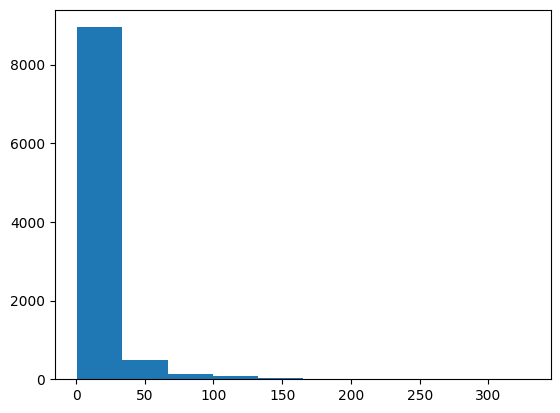

In [29]:
### graficar distribucion
fig  = plt.hist(rating_books['cnt_rat'])

In [48]:
####Excluir las peliculas que no tengan más de 30 calificaciones 
rating_books2=pd.read_sql(''' select movieId,
                         count(*) as cnt_rat
                         from "ratings_2"
                         group by movieId
                         having cnt_rat >= 30
                         order by cnt_rat desc
                         ''',conn )


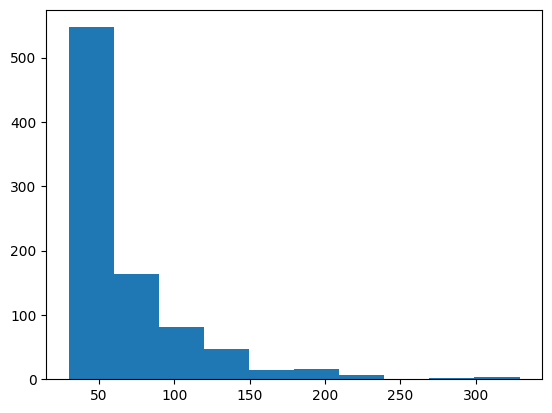

In [49]:
fig  = plt.hist(rating_books2['cnt_rat'])

In [55]:
fn.ejecutar_sql('preprocesamientos.sql', cur)

NameError: name 'fn' is not defined

In [ ]:
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

In [ ]:
### verficar tamaño de tablas con filtros ####

pd.read_sql('select count(*) from "ratings_2"', conn)
pd.read_sql('select count(*) from "ratings_3"', conn)